In [481]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt

In [482]:
low = np.array([0,50,0]) #trasholds for color detection 
high = np.array([360,100,110]) #tresholds for color detection 100 posledni hodnota !!!!
object_size_max = 6000 #max surface of object in px
object_size_min = 1000 #minimal surface of object in px 

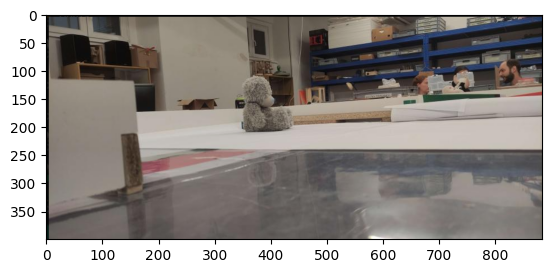

In [483]:
img = cv2.imread('test3.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [484]:
img_height,img_width,img_channels = img.shape
print('width',img_width,'Px')
print('height',img_height,'Px')
print('channels',img_channels)

width 884 Px
height 400 Px
channels 3


112 212 63 113
454 97 111 51
62 64 148 109
5 36 152 80
357 4 77 108
[(268.5, 143.5), (122.5, 509.5), (118.5, 136.0), (76.0, 81.0), (58.0, 395.5)]


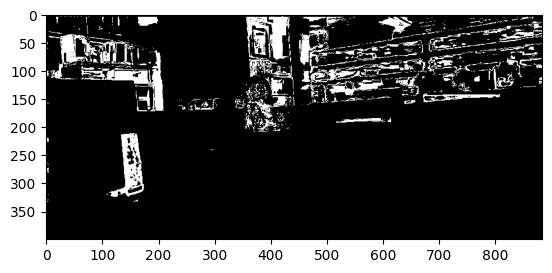

In [485]:
cordinates = []#list for objects coordinates 
y_cor = []
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(img,low,high)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
if len(contours) != 0:
    for contour in contours:
        if (cv2.contourArea(contour) > object_size_min) and (cv2.contourArea(contour) < object_size_max):
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,255),5)
            print(x,y,w,h)
            xs = x + w/2#center of object in x
            ys = y + h/2#center of object in y
            c= ys,xs# x and y center coordinates of object 
            cordinates.append(c)
            y_cor.append(ys)
print(cordinates)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

In [486]:
#vypocet
xx = img_width/2
yy = img_height/2
cordinates.sort()
y_cor.sort()
print(cordinates)
print('ycordinates:',y_cor)
def finde():
    for value in y_cor:
        if value >= yy:
            return value
    return y_cor[-1]
yt = finde()
print(yt)
i = y_cor.index(yt)
print(i)
x,y = cordinates[i]
y,x=int(x),int(y)
print(x,y)

[(58.0, 395.5), (76.0, 81.0), (118.5, 136.0), (122.5, 509.5), (268.5, 143.5)]
ycordinates: [58.0, 76.0, 118.5, 122.5, 268.5]
268.5
4
143 268


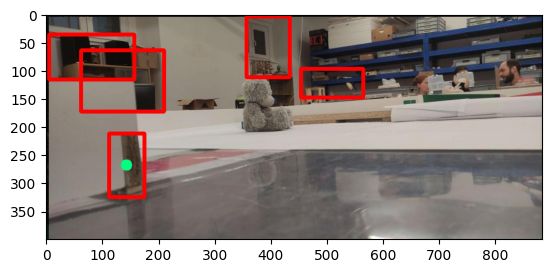

In [487]:

cv2.circle(img, (x,y),10, (255,255,255), thickness=-1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))